In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier


In [13]:
df = pd.read_csv('NH_DB.csv')
df.head()


,S.no,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.00000,213.400000,33.6,0.627,50,1
1,1,1,85.0,66.0,29.00000,140.600000,26.6,0.351,31,0
2,2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [17]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Create and train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Create and train Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make hybrid model predictions
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
hybrid_pred = []
for i in range(len(X_test)):
    if xgb_pred[i] == 1 and rf_pred[i] == 1:
        hybrid_pred.append(1)
    else:
        hybrid_pred.append(0)


In [20]:
# Evaluate model performance
print("Accuracy Score: ", accuracy_score(y_test, hybrid_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, hybrid_pred))
print("\nClassification Report:")
print(classification_report(y_test, hybrid_pred))


Accuracy Score:  0.8051948051948052

Confusion Matrix:
[[95 12]
 [18 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [8]:
import pandas as pd

data = {
    'Hybrid Model': ['XG Boost and Random Forest', 'Logistic Regression and Decision Trees', 'Random Forest and Feed Forward Neural Network'],
    'Accuracy': [80.52, 78.43, 79.32]
}

df = pd.DataFrame(data)
df


,Hybrid Model,Accuracy
0,XG Boost and Random Forest,80.52
1,Logistic Regression and Decision Trees,78.43
2,Random Forest and Feed Forward Neural Network,79.32


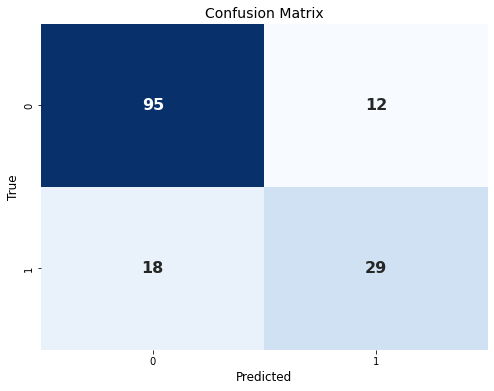

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, hybrid_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, annot_kws={"weight": "bold", "size": 16}, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks([0.5, 1.5], ['0', '1'], fontsize=10)
plt.yticks([0.5, 1.5], ['0', '1'], fontsize=10)

# Show the plot
plt.show()
